In this tutorial, we are going to implement a linear regression model to predict california housing prices. We will build the model from scratch using numpy. This will be a great approach to begin understanding regression based models.

After completing this tutorial the learner is expected to know the basic building blocks of a linear regression model. The learner is also expected to know the pipeline of reading and transforming data for machine learning workflows.



In [ ]:
## Import the usual libraries
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Importing the dataset

The real-world dataset can be obtained by the function `fetch_california_housing` that downloads the dataset for us.

The `as_frame` parameter returns a pandas dataframe which is a library useful for viewing contents of the data.



In [ ]:
# Fetch the data using sklearn function
bunch = fetch_california_housing(download_if_missing=True, as_frame=True)

# Load the dataframe and view
df = bunch.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


For this dataset, our target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).

We can take a closer look at the various statistical parameters of the dataset using pandas. The `describe` function will help us.

In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


As we can see the data in each of the columns is on different scales. For example, the average bedroom value is around 1 and the average population is around 1425.

Generally, machine learing models do not work well when the data is on different scales. Thus, we have to normalize our data in the range [-1,1]. The module [StandardScalar](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) will help us in this.

The training data should always be normalized. The testing data should be normalized using the values of the training data.

In [ ]:
df = bunch.frame
x = df.iloc[:,:-1] # Select all the columns, except the last column
y = df.iloc[:,-1:] # Select the last column
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 1)

input_scalar = StandardScaler()
output_scalar = StandardScaler()

x_train = input_scalar.fit_transform(x_train).T # Normalize train data
x_test = input_scalar.transform(x_test).T # Only transform test data using values of train data

y_train = output_scalar.fit_transform(y_train).reshape(-1)
y_test = output_scalar.transform(y_test).reshape(-1)

dataset_copy = [ x_train.copy(), x_test.copy(),  y_train.copy(),  y_test.copy()]

# Linear Regression Model

Now we define our linear regression model from scratch.

A linear regression model is of the form:

$y = a_1 x_1 + a_2 x_2 + \dots + a_nx_n + a_{n+1}$
  
The above can be rewritten using matrix multiplication as

$ y = w^T x $

where

$ w = [a_1, a_2, \dots,  a_n, a_{n+1}]^T $

$ x = [x_1, x_2, \dots,  x_n]^T $


In [ ]:
class LinearRegression():
  def __init__(self, dim, lr = 0.1):
    assert isinstance
    self.lr = lr
    self.w = np.zeros((dim))
    self.grads = {"dw": np.zeros((dim)) +5}

  def forward(self, x):
    y = self.w.T @ x
    return y

  def backward(self, x, y_hat, y):
    assert y_hat.shape == y.shape
    self.grads["dw"] = (1 / x.shape[1]) * ((y_hat - y) @ x.T).T
    assert self.grads["dw"].shape == self.w.shape

    # print(self.grads["dw"])

  def optimize(self):
    self.w = self.w - self.lr * self.grads["dw"]

# Loss

For linear regression, various loss functions such as the mean absolute error, mean squared error, or root mean squared error can be used.

In this example, we will use the mean squared error (MSE) loss.

The MSE loss is given by

$ error = \frac{1}{m} Σ_{i=1}^{m} (y_{true}^{i} - y_{pred}^{i})^2 $

where $i$ denotes the particular obseration/row in the dataset and $m$ is the total number of obserations.

To ensure our model is correct, the loss should decrease over each epoch.


Epoch 0 | Train Loss 0.49999999999999983 | Test Loss 0.43712002508129305
Epoch 20 | Train Loss 0.2359010824314295 | Test Loss 0.2325611904818386
Epoch 40 | Train Loss 0.22188755162559423 | Test Loss 0.2217635127918686
Epoch 60 | Train Loss 0.21474640752415047 | Test Loss 0.2152613227580797
Epoch 80 | Train Loss 0.2095989567021037 | Test Loss 0.21037193610067245
Epoch 100 | Train Loss 0.20581761895152345 | Test Loss 0.20673038702760732
Epoch 120 | Train Loss 0.20303294882659725 | Test Loss 0.20402527473733864
Epoch 140 | Train Loss 0.20097918345162274 | Test Loss 0.20201418597478873
Epoch 160 | Train Loss 0.19946210112703647 | Test Loss 0.20051638978054404
Epoch 180 | Train Loss 0.19833950070910428 | Test Loss 0.19939846923590557
Epoch 200 | Train Loss 0.19750719045004836 | Test Loss 0.19856209982480624
Epoch 220 | Train Loss 0.1968887724916989 | Test Loss 0.1979347869242644
Epoch 240 | Train Loss 0.19642818272324772 | Test Loss 0.19746302071881933
Epoch 260 | Train Loss 0.1960842406520

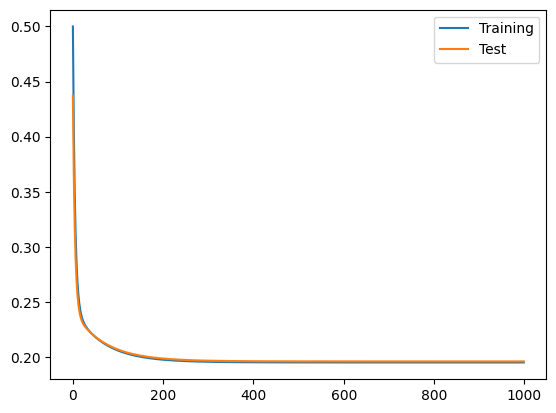

In [ ]:
num_epochs = 1000
train_loss_history = []
test_loss_history = []
w_history = []
dim = x_train.shape[0]
num_train = x_train.shape[1]
num_test = x_test.shape[1]


model = LinearRegression(dim = dim, lr = 0.1)
for i in range(num_epochs):
  y_hat = model.forward(x_train)
  train_loss = 1/(2 * num_train) * ((y_train - y_hat) ** 2).sum()

  w_history.append(model.w)
  model.backward(x_train,y_hat,y_train)
  model.optimize()

  y_hat = model.forward(x_test)
  test_loss = 1/(2 * num_test) * ((y_test - y_hat) ** 2).sum()

  train_loss_history.append(train_loss)
  test_loss_history.append(test_loss)

  if i % 20 == 0:
    print(f"Epoch {i} | Train Loss {train_loss} | Test Loss {test_loss}")

plt.plot(range(num_epochs), train_loss_history, label = "Training")
plt.plot(range(num_epochs), test_loss_history, label = "Test")
plt.legend()
plt.show()

# Results

Before viewing the results, we need to reverse the transformations applied on the output variable y.

The `inverse_transform` method of the StandardScaler object will help us.

In [ ]:
from sklearn.metrics import mean_squared_error
y_test = output_scalar.inverse_transform(y_test[np.newaxis,:])
y_hat  = output_scalar.inverse_transform(y_hat[np.newaxis,:])
error = (((y_test - y_hat) ** 2).sum() / num_test )
print("Test Set Error", error)

Test Set Error 0.5263663693241227


# Libraries

Instead of coding everything from scratch, i.e the model, loss functions, and gradient calculations, there are many libaries that have implemented many machine learning algorithms for us.

These libraries will generally be faster and more optimized. We can use the LinearRegression and SGD regressor module from scikit learn to compare our model

In [ ]:
from sklearn.linear_model import SGDRegressor


x_train, x_test, y_train, y_test = dataset_copy
sgd = SGDRegressor()
sgd.fit(x_train.T, y_train)
y_hat = sgd.predict(x_test.T)
y_test = output_scalar.inverse_transform(y_test[np.newaxis,:])
y_hat  = output_scalar.inverse_transform(y_hat[np.newaxis,:])
error = mean_squared_error(y_test, y_hat, squared = True)
print("Test Set Error", error)

Test Set Error 0.5283990996392857


In [ ]:
from sklearn.linear_model import LinearRegression as LR

x_train, x_test, y_train, y_test = dataset_copy
lr = LR()
lr.fit(x_train.T, y_train)
y_hat = lr.predict(x_test.T)
y_test = output_scalar.inverse_transform(y_test[np.newaxis,:])
y_hat  = output_scalar.inverse_transform(y_hat[np.newaxis,:])
error = mean_squared_error(y_test, y_hat, squared = True)
print("Test Set Error", error)

Test Set Error 0.5263803029005857
